In [1]:
import pandas as pd
import numpy as np
import altair as alt

# Data Preparation

Data scraped from Forbes: <a href='https://www.forbes.com/global2000/list/#header:profits_sortreverse:true'>Source</a>

In [2]:
with open('forbes.html') as f:
    raw_html = f.read()

In [3]:
df = pd.read_html(raw_html)[0]
print(df.shape)
df.head()

(2199, 8)


,Unnamed: 0,Rank,Company,Country,Sales,Profits,Assets,Market Value
0,NaN,#8,Apple,United States,$247.5 B,$53.3 B,$367.5 B,$926.9 B
1,NaN,#88,British American Tobacco,United Kingdom,$26.1 B,$48.3 B,$190.8 B,$120 B
2,NaN,#1,ICBC,China,$165.3 B,$43.7 B,"$4,210.9 B",$311 B
3,NaN,#14,Samsung Electronics,South Korea,$224.6 B,$41 B,$293.2 B,$325.9 B
4,NaN,#4,Berkshire Hathaway,United States,$235.2 B,$39.7 B,$702.7 B,$491.9 B


Drop unneeded columns and rows with missing values (these correspond to embedded adverts).

In [4]:
df = df.drop(df.columns[:2], axis=1)
df = df.dropna()
df = df.reset_index(drop=True)
print(df.shape)
df.head()

(2000, 6)


,Company,Country,Sales,Profits,Assets,Market Value
0,Apple,United States,$247.5 B,$53.3 B,$367.5 B,$926.9 B
1,British American Tobacco,United Kingdom,$26.1 B,$48.3 B,$190.8 B,$120 B
2,ICBC,China,$165.3 B,$43.7 B,"$4,210.9 B",$311 B
3,Samsung Electronics,South Korea,$224.6 B,$41 B,$293.2 B,$325.9 B
4,Berkshire Hathaway,United States,$235.2 B,$39.7 B,$702.7 B,$491.9 B


Not all of the monetary values (currently strings) end in 'B'.

In [5]:
df.loc[(~df['Sales'].str.endswith('B') | ~df['Profits'].str.endswith('B')) |
       (~df['Assets'].str.endswith('B') | ~df['Market Value'].str.endswith('B'))]

,Company,Country,Sales,Profits,Assets,Market Value
93,Freddie Mac,United States,$73.5 B,$6.3 B,"$2,022.5 B",$858 M
128,Abengoa,Spain,$1.7 B,$4.8 B,$7.6 B,$255 M
186,Porsche Automobil Holding,Germany,$38 M,$3.8 B,$38.1 B,$25.7 B
231,BGF Retail,South Korea,$2.4 B,$3.1 B,$802 M,$3.2 B
377,Gecina,France,$799 M,$2.1 B,$24.1 B,$12.8 B
399,Liberty Broadband,United States,$22 M,$2 B,$12 B,$12.8 B
431,Wanhua Chemical Group,China,$8.3 B,$1.9 B,$10.6 B,-
538,3i Group,United Kingdom,$353 M,$1.5 B,$9.6 B,$12.9 B
571,Aroundtown,Luxembourg,$594 M,$1.4 B,$16.5 B,$8.6 B
603,Steinhoff International,Netherlands,$18.1 B,$1.4 B,$37.1 B,$574 M


Convert monetary values from strings to floats, adjusting to billions where necessary, and dropping rows with invalid data.

In [6]:
def cash_to_float(string):
    num_str = string.replace(',', '')
    num_str = num_str[1:]
    try:
        if num_str[-1] == 'M':
            return float(num_str[:-2])/1000
        else:
            return float(num_str[:-2])
    except:
        return np.nan

for col in df.columns[2:]:
    df[col] = df[col].apply(cash_to_float)

df = df.dropna()
print(df.shape)
df.head()

(1993, 6)


,Company,Country,Sales,Profits,Assets,Market Value
0,Apple,United States,247.5,53.3,367.5,926.9
1,British American Tobacco,United Kingdom,26.1,48.3,190.8,120.0
2,ICBC,China,165.3,43.7,4210.9,311.0
3,Samsung Electronics,South Korea,224.6,41.0,293.2,325.9
4,Berkshire Hathaway,United States,235.2,39.7,702.7,491.9


Simplify 'Country' column.

In [7]:
top5_countries = df['Country'].value_counts().index[:5]
df.loc[~df['Country'].isin(top5_countries), 'Country'] = 'Other'
df['Country'].value_counts()

Other             821
United States     559
China             230
Japan             228
United Kingdom     88
South Korea        67
Name: Country, dtype: int64

Rename columns.

In [8]:
df.columns = ['Company', 'Country', 'Revenue', 'Profits', 'Assets', 'Market Cap']

# Static Visualisation

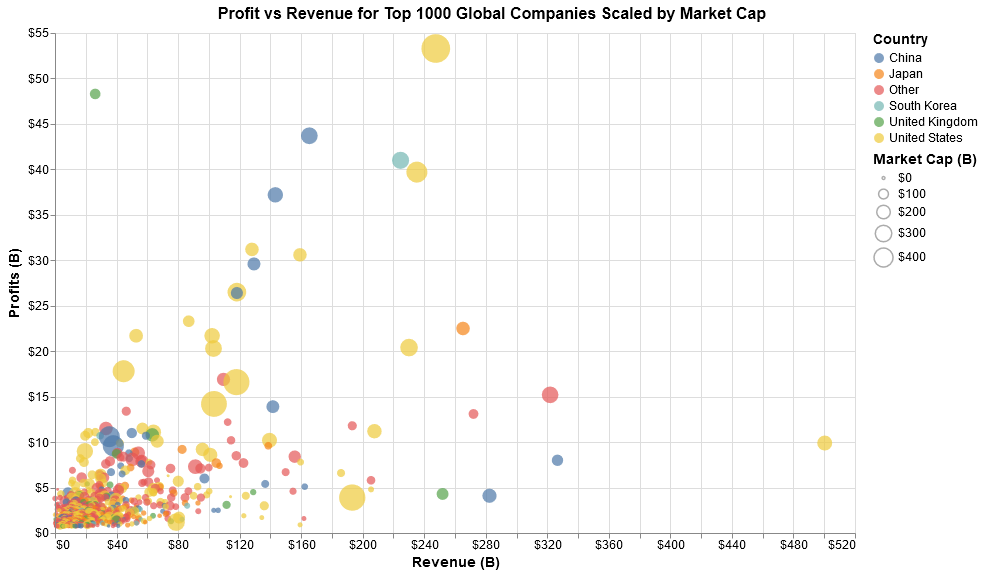

In [9]:
top = 1000
df_top = df[:top]

alt.Chart(df_top).mark_circle().encode(
    alt.X('Revenue', axis=alt.Axis(format='$f', title='Revenue (B)'), scale=alt.Scale(domain=[0, 520], nice=40)),
    alt.Y('Profits', axis=alt.Axis(format='$', title='Profits (B)')),
    color='Country',
    size=alt.Size('Market Cap', legend=alt.Legend(format='$f', title='Market Cap (B)'), scale=alt.Scale(domain=[0, 400])),
    opacity=alt.value(0.7),
).properties(
    title='Profit vs Revenue for Top {} Global Companies Scaled by Market Cap'.format(top),
    width=800,
    height=500,
).configure(
    title={'fontSize': 16},
    axis={'labelFontSize': 12, 'titleFontSize': 14},
    legend={'titleFontSize': 14, 'labelFontSize': 12},
)

# Interactive Visualisation

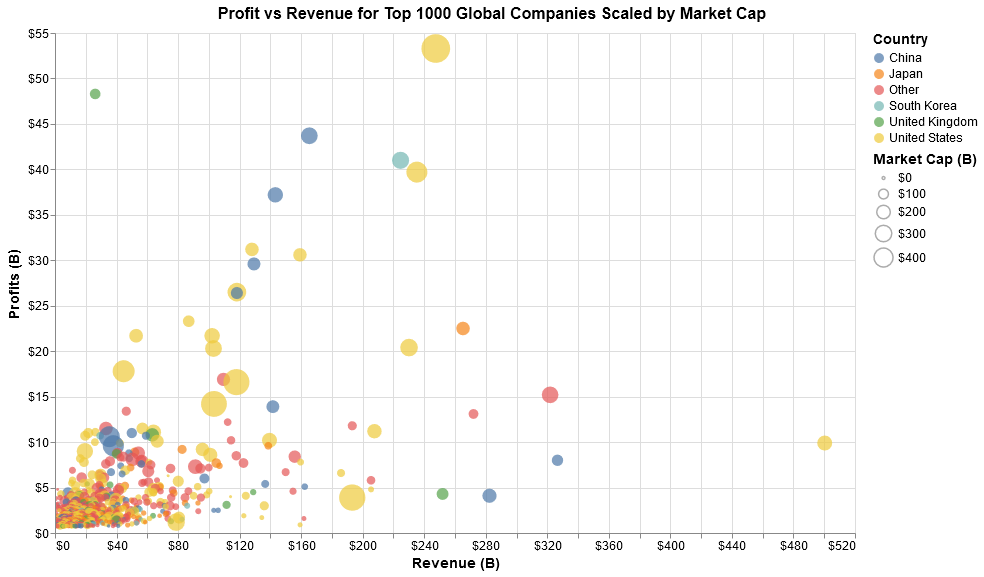

In [10]:
top = 1000
df_top = df[:top]

selection = alt.selection_multi(fields=['Country'])

chart = alt.Chart(df_top).mark_circle().encode(
    alt.X('Revenue', axis=alt.Axis(format='$f', title='Revenue (B)'), scale=alt.Scale(domain=[0, 520], nice=40)),
    alt.Y('Profits', axis=alt.Axis(format='$', title='Profits (B)')),
    color='Country',
    size=alt.Size('Market Cap', legend=alt.Legend(format='$f', title='Market Cap (B)'), scale=alt.Scale(domain=[0, 400])),
    opacity=alt.value(0.7),
    tooltip=['Company', 'Country', 'Revenue', 'Profits', 'Market Cap']
).properties(
    title='Profit vs Revenue for Top {} Global Companies Scaled by Market Cap'.format(top),
    width=800,
    height=500,
    selection=selection,
).configure(
    title={'fontSize': 16},
    axis={'labelFontSize': 12, 'titleFontSize': 14},
    legend={'titleFontSize': 14, 'labelFontSize': 12},
).transform_filter(
    selection,
).interactive()
chart.save('tpr_altair.html')
chart

In [11]:
df.to_csv('top_profit.csv')